# Noise Classifier

In [1]:
import pandas as pd 
import numpy as np 
import os
import cv2
import matplotlib.pyplot as plt
import warnings

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow import keras
import tensorflow 

import scipy
print("Num GPUs Available: ", len(tensorflow.config.list_physical_devices('GPU')))


# Set the seed value for experiment reproduci.bility.
seed = 1842
tensorflow.random.set_seed(seed)
np.random.seed(seed)
# Turn off warnings for cleaner looking notebook
warnings.simplefilter('ignore')

Num GPUs Available:  1


Alttaki kısımda ise örnek koddan farklı olarak test verisini çıkardım. Bu verileri bir yere kayıt etmeyeceğim için deneme için bir veri kenara ayırmadım.

In [5]:
#define image dataset 
#why do we rescale?
image_generator = ImageDataGenerator(rescale=1/255,validation_split=0.2) #shear_range =.25, zoom_range =.2, horizontal_flip = True, rotation_range=20)     


train_dataset = image_generator.flow_from_directory(batch_size=4,
                                                directory='preprocessedData',
                                                shuffle=True,
                                                target_size=(300,300), 
                                                subset='training',
                                                class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=4,
                                                directory='preprocessedData',
                                                shuffle=True,
                                                target_size=(300,300), 
                                                subset='validation',
                                                class_mode='categorical')

Found 6989 images belonging to 10 classes.
Found 1743 images belonging to 10 classes.


Örnek Fotoğraflar

(300, 300, 3)


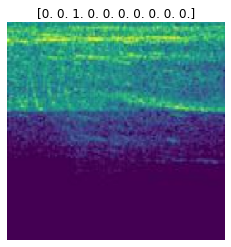

(300, 300, 3)


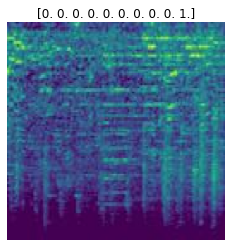

In [6]:
batch_1_img = train_dataset[0]
for i in range(0,2):
    img = batch_1_img[0][i]
    lab = batch_1_img[1][i]
    print(img.shape)
    plt.imshow(img)
    plt.title(lab)
    plt.axis('off')
    plt.show()

# CNN

### First CNN

Burada konvolüsyon işlemi yaparak yapay sinir ağımıza farklı bir yaklaşım sergilettiriyoruz.

Üstteki gibi burada da filtrelerle oynamalar yapıp doğruluk oranının değişimine baktım.

In [10]:
#experiment with Convolutional neural net
model = keras.models.Sequential([
keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape = [300,300,3]),
keras.layers.MaxPooling2D(),
keras.layers.Conv2D(64, (2, 2), activation='relu'),
keras.layers.MaxPooling2D(),
keras.layers.Conv2D(64, (2, 2), activation='relu'),
keras.layers.Flatten(),
keras.layers.Dense(100, activation='relu'),
keras.layers.Dense(10, activation ='softmax')])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 149, 149, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      8256      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 73, 73, 64)        16448     
                                                                 
 flatten_1 (Flatten)         (None, 341056)           

In [11]:
model.compile(
optimizer = 'adam',
loss = tensorflow.losses.CategoricalCrossentropy(),
metrics = ['accuracy'])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=5,
                                            restore_best_weights=True)

In [12]:
model.fit(train_dataset, epochs=20, validation_data=validation_dataset, callbacks=callback)
#save model
#early stopping

Epoch 1/20
 810/1748 [============>.................] - ETA: 18s - loss: 2.3321 - accuracy: 0.1115

KeyboardInterrupt: 

In [11]:
loss, accuracy = model.evaluate(test_dataset)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

220/220 [==============================] - 1s 5ms/step - loss: 5.4351 - accuracy: 0.4424
Loss:  5.435067653656006
Accuracy:  0.44241732358932495


### Second CNN

In [5]:
model = keras.models.Sequential([
keras.layers.Conv2D(224, (3, 3), activation='relu', input_shape = [150,150,3]),
keras.layers.MaxPooling2D(),
keras.layers.Conv2D(448, (2, 2), activation='relu'),
keras.layers.MaxPooling2D(),
keras.layers.Conv2D(448, (2, 2), activation='relu'),
keras.layers.Flatten(),
keras.layers.Dense(100, activation='relu'),
keras.layers.Dense(10, activation ='softmax')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 224)     6272      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 224)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 73, 73, 448)       401856    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 448)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 35, 35, 448)       803264    
                                                                 
 flatten_1 (Flatten)         (None, 548800)           

In [13]:
model.compile(
optimizer = 'adam',
loss = tensorflow.losses.CategoricalCrossentropy(),
metrics = ['accuracy'])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=5,
                                            restore_best_weights=True)

In [14]:
model.fit(train_dataset, epochs=20, validation_data=validation_dataset, callbacks=callback)
#save model
#early stopping

Epoch 1/20
1572/1572 [==============================] - 89s 54ms/step - loss: 2.3171 - accuracy: 0.1104 - val_loss: 2.3007 - val_accuracy: 0.1136
Epoch 2/20
1572/1572 [==============================] - 86s 55ms/step - loss: 2.3012 - accuracy: 0.1128 - val_loss: 2.3005 - val_accuracy: 0.1136
Epoch 3/20
1572/1572 [==============================] - 86s 55ms/step - loss: 2.3010 - accuracy: 0.1134 - val_loss: 2.3005 - val_accuracy: 0.1136
Epoch 4/20
1572/1572 [==============================] - 86s 55ms/step - loss: 2.3010 - accuracy: 0.1118 - val_loss: 2.3004 - val_accuracy: 0.1136
Epoch 5/20
1572/1572 [==============================] - 86s 55ms/step - loss: 2.3011 - accuracy: 0.1134 - val_loss: 2.3004 - val_accuracy: 0.1136
Epoch 6/20
1572/1572 [==============================] - 86s 54ms/step - loss: 2.3011 - accuracy: 0.1134 - val_loss: 2.3004 - val_accuracy: 0.1136
Epoch 7/20
1572/1572 [==============================] - 86s 54ms/step - loss: 2.3011 - accuracy: 0.1134 - val_loss: 2.3004 -

In [15]:
loss, accuracy = model.evaluate(test_dataset)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

220/220 [==============================] - 3s 12ms/step - loss: 2.3005 - accuracy: 0.1129
Loss:  2.3005259037017822
Accuracy:  0.11288483440876007


# VGG Transfer Learning

VGG19'u kullanarak transfer learning ile elde edeceğimiz sonuçlara bakmak amacıyla böyle bir yol izliyorum...

In [3]:
vgg = VGG19(input_shape=(300,300,3), weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = True
x = Flatten()(vgg.output)
prediction = Dense(10, activation='softmax')(x)

modelvgg = Model(inputs=vgg.input, outputs=prediction)
modelvgg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500, 374, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 500, 374, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 500, 374, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 250, 187, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 250, 187, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 250, 187, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 125, 93, 128)      0     

In [4]:
modelvgg.compile(
optimizer = 'Adam',
loss = tensorflow.losses.CategoricalCrossentropy(),
metrics = ['accuracy'])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            restore_best_weights=True)

In [ ]:
modelvgg.fit(train_dataset, epochs=20, validation_data=validation_dataset, callbacks=callback)


In [19]:
loss, accuracy = modelvgg.evaluate(test_dataset)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

220/220 [==============================] - 5s 21ms/step - loss: 2.0523 - accuracy: 0.3466
Loss:  2.052309274673462
Accuracy:  0.34663626551628113


In [20]:
vgg = ResNet50(input_shape=(150,150,3), weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)
prediction = Dense(10, activation='softmax')(x)

modelvgg = Model(inputs=vgg.input, outputs=prediction)
modelvgg.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']       

In [21]:
modelvgg.compile(
optimizer = 'Adam',
loss = tensorflow.losses.CategoricalCrossentropy(),
metrics = ['accuracy'])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            restore_best_weights=True)

modelvgg.fit(train_dataset, epochs=35, validation_data=validation_dataset, callbacks=callback)

Epoch 1/35
1572/1572 [==============================] - 30s 17ms/step - loss: 3.3496 - accuracy: 0.1137 - val_loss: 4.1270 - val_accuracy: 0.1104
Epoch 2/35
1572/1572 [==============================] - 26s 16ms/step - loss: 3.2867 - accuracy: 0.1366 - val_loss: 2.7054 - val_accuracy: 0.1372
Epoch 3/35
1572/1572 [==============================] - 26s 16ms/step - loss: 3.1298 - accuracy: 0.1446 - val_loss: 2.9064 - val_accuracy: 0.1474
Epoch 4/35
1572/1572 [==============================] - 26s 16ms/step - loss: 3.1670 - accuracy: 0.1549 - val_loss: 2.6248 - val_accuracy: 0.1678
Epoch 5/35
1572/1572 [==============================] - 26s 16ms/step - loss: 3.0766 - accuracy: 0.1678 - val_loss: 3.9592 - val_accuracy: 0.1372
Epoch 6/35
1572/1572 [==============================] - 26s 16ms/step - loss: 3.0718 - accuracy: 0.1748 - val_loss: 3.1990 - val_accuracy: 0.1704
Epoch 7/35
1572/1572 [==============================] - 26s 16ms/step - loss: 3.0749 - accuracy: 0.1824 - val_loss: 4.0768 -

In [22]:
loss, accuracy = modelvgg.evaluate(test_dataset)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

220/220 [==============================] - 3s 13ms/step - loss: 2.6137 - accuracy: 0.1790
Loss:  2.6137356758117676
Accuracy:  0.17901939153671265
